# Churn Case Study

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

New competitor entered offering triple play, resulting in increased churn.

Want better way to spot potential churning customers and suggested actions what to do.

## **Assignment**

- Define the business problem
- Determine which evaluation metric you find appropriate:
   - accuracy
   - precision
   - recall
   - f1 score
- Determine which type of slice/segment/type of churn you are interested
- Run "data prep code"
- Use logistic regression to create 2-3 model specifications
  - model 1 (vanilla model): uses cleaned data as is, find best cutoff using chosen metric
  - model 2: create at least **2 new features** and add them to the model
  - model 3 (if time, a 'reach' model): increase the LASSO penalty to decrease the feature set
- Pick the "best" model and find the "best" threshold
- Use "best" model to identify the drivers of churn in your segment analysis and make recommendations for the company
- Each group will have 5 minutes to present their recommendations to the rest of the class. Make sure to share:
   - segment you chose
   - evaluation metric you chose based on the business problem
   - evaluation metric of "best" model's threshold & threshold
   - what drives churn and what are your recommendations
   - **if you had more time** what would you work on?

## Data

<img src="https://images.pexels.com/photos/53621/calculator-calculation-insurance-finance-53621.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style = "width:400px" >
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information 
     - how long they’ve been a customer (tenure is in months)
     - contract, payment method, paperless billing, monthly charges, and total charges
     - all "totals" are over the length of the contract
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Usage
    - information about their usage patterns
    - again, usage totals are over length of contract

## Concept: Churn

#### Type of churn:

**Voluntary** – they left after contract was up

**Involuntary** – we fired them

**Early churn** – left early, broke contract

### Churn is a survival problem:
- Predicting who will churn next month is really hard
- Predicting who may churn over next 3 months is easier

<img src = "./img/funnel.png" style="width:800px">

There are many reasons to churn &#8594; **feature engineering is king**

### Solutions need to be tied to root problems

<img src = "./img/solution.png" style="width:800px">

### Different solutions have different time frames

<img src = "./img/time.png" style="width:800px">

## Remember:

#### You will not be paid to create intricate models
### You will be paid to **Solve Problems**

# Get Started!

## Part 1: Business problem

#### End Users: Client: Telco Company


#### True business problem: Identifying causes of churn in the customer "journey". 


#### Context:

- **False negative**: Predict that a variable is not going to cause customer churn, when in fact it does. 
    - **Outcome**: Missed opportunity to retain customer.
- **False positive** Predict that a variable is going to cause customer churn, when in fact it does not. 
    - **Outcome**: Offer incentive to stay to customers who are not at risk of churning.

## Part 2: Evaluation Metric
Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- Accuracy
- Precision
- **Recall**
- F1-Score

## Part 3: Segment choice

- We are most interested in voluntary churn.

## Part 4: Data Prep Code

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
# Import pacakges
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

# Drop nas
telco.dropna(inplace=True)

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(telco.drop(columns=['customerID','Churn']), np.where(telco.Churn =="Yes", 1, 0), test_size=0.33, random_state=42)

# Separate out numeric from categorical variables
cat_var = telco.select_dtypes(include='object')
cat_var.drop(columns=['customerID','Churn'], inplace = True)

num_var = telco.select_dtypes(exclude = 'object') 

# Encode categorical variables
ohc = OneHotEncoder(drop='first')
encoded_cat = ohc.fit_transform(X_train[cat_var.columns.tolist()]).toarray()

# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

# Reassemble entire training dataset
clean_X_train = pd.concat([X_train[num_var.columns.tolist()] , encoded], axis=1,  sort=False)
clean_X_train.shape

encoded_cat = ohc.transform(X_test[cat_var.columns.tolist()]).toarray()
# Add feature names to encoded vars
encoded=pd.DataFrame(encoded_cat, columns=ohc.get_feature_names(cat_var.columns.tolist()))
encoded.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
# Reassemble entire training dataset
clean_X_test = pd.concat([X_test[num_var.columns.tolist()] , encoded], axis=1,  sort=False)

C:\Users\yazan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
telco

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,0,168.8,137,241.4,107,204.8,106,15.5,4,0,354,705,119,593.3,No
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,0,122.2,112,131.7,94,169.5,106,10.3,9,5,326,292,75,280.9,Yes
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,36,178.7,134,178.6,102,126.8,82,8.0,4,2,324,1840,257,571.5,No
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,0,190.2,68,262.2,64,130.0,92,8.8,4,0,228,1389,180,7904.3,No
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,0,67.7,68,195.7,86,236.5,137,12.0,2,1,294,170,1,340.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,9979-RGMZT,Female,0,No,No,7,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,No,No,0,90.5,142,211.7,75,194.9,76,9.3,2,1,296,817,106,633.5,No
3329,9986-BONCE,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),No,No,0,85.7,112,221.6,70,190.6,75,11.6,3,4,264,0,0,85.5,Yes
3330,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,No,0,197.9,84,168.1,113,239.8,145,12.0,6,1,349,241,48,742.9,No
3331,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,Yes,14,93.6,137,193.8,72,144.9,84,17.5,5,1,299,86,19,92.8,No


In [5]:
scaler = StandardScaler()

In [6]:
X_train_scaled = scaler.fit_transform(clean_X_train)
X_test_scaled = scaler.transform(clean_X_test)

## Part 5: Create models

In [7]:
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

from IPython.display import display, HTML


In [8]:
logreg = LogisticRegression()

In [9]:
vanilla_mod = logreg.fit(X_train_scaled, y_train)

In [10]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

In [11]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8694
TEST: 0.8471
***************
Recall:
TRAIN: 0.5399
TEST: 0.5066
***************
Precision:
TRAIN: 0.7077
TEST: 0.6725
***************
F1-Score:
TRAIN: 0.6125
TEST: 0.5779
***************


In [12]:
logreg = LogisticRegression()
vanilla_mod = logreg.fit(X_train_scaled, y_train)

y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

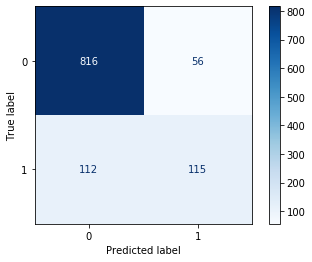

In [13]:
plot_confusion_matrix(logreg, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, 
                      values_format=".3g") 
plt.show()

In [14]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8694
TEST: 0.8471
***************
Recall:
TRAIN: 0.5399
TEST: 0.5066
***************
Precision:
TRAIN: 0.7077
TEST: 0.6725
***************
F1-Score:
TRAIN: 0.6125
TEST: 0.5779
***************


In [15]:
logreg2 = LogisticRegression(class_weight='balanced')
balanced_mod = logreg2.fit(X_train_scaled, y_train)

y_pred_train_bl = logreg2.predict(X_train_scaled)
y_pred_test_bl = logreg2.predict(X_test_scaled)

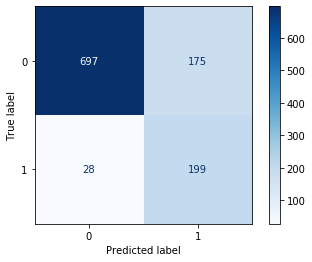

In [16]:
plot_confusion_matrix(logreg2, X_test_scaled, y_test,
                      cmap=plt.cm.Blues, 
                      values_format=".3g") 
plt.show()

In [17]:
metrics = {"Accuracy": accuracy_score,
           "Recall": recall_score,
           "Precision": precision_score,
           "F1-Score": f1_score}

for name, metric_function in metrics.items():
    print(f"{name}:"); print("="*len(name))
    print(f"TRAIN: {metric_function(y_train, y_pred_train_bl):.4f}")
    print(f"TEST: {metric_function(y_test, y_pred_test_bl):.4f}")
    print("*" * 15)

Accuracy:
TRAIN: 0.8214
TEST: 0.8153
***************
Recall:
TRAIN: 0.8779
TEST: 0.8767
***************
Precision:
TRAIN: 0.5194
TEST: 0.5321
***************
F1-Score:
TRAIN: 0.6527
TEST: 0.6622
***************


## Part 6: Pick model & find best threshold

In [18]:
logreg.predict_proba(X_test_scaled)

array([[9.99462772e-01, 5.37227568e-04],
       [9.15245266e-01, 8.47547335e-02],
       [1.38155502e-01, 8.61844498e-01],
       ...,
       [8.57429762e-01, 1.42570238e-01],
       [9.55619383e-01, 4.43806167e-02],
       [9.93883816e-01, 6.11618422e-03]])

In [19]:
logreg2.predict_proba(X_test_scaled)[:, 1]

array([0.00215822, 0.29496807, 0.97617683, ..., 0.36929697, 0.16803325,
       0.02343835])

In [20]:
y_test_pred_probs = logreg2.predict_proba(X_test_scaled)[:, 1]

In [21]:
y_train_pred_probs = logreg2.predict_proba(X_train_scaled)[:, 1]

In [22]:
metrics_df = pd.DataFrame(columns=['threshold', 'train_recall', 'test_recall'])

for x in np.arange(y_train_pred_probs.min(), y_train_pred_probs.max(), 0.01):
    placeholder = []
    threshold = x
    y_pred_train = np.where(y_train_pred_probs > x, 1, 0)
    r_pred_test = np.where(y_test_pred_probs > x, 1, 0)
    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, r_pred_test)
    placeholder = [threshold, train_recall, test_recall]
    sample_S = pd.Series(placeholder, index=[
                         'threshold', 'train_recall', 'test_recall'])
    metrics_df = metrics_df.append(sample_S, ignore_index=True)

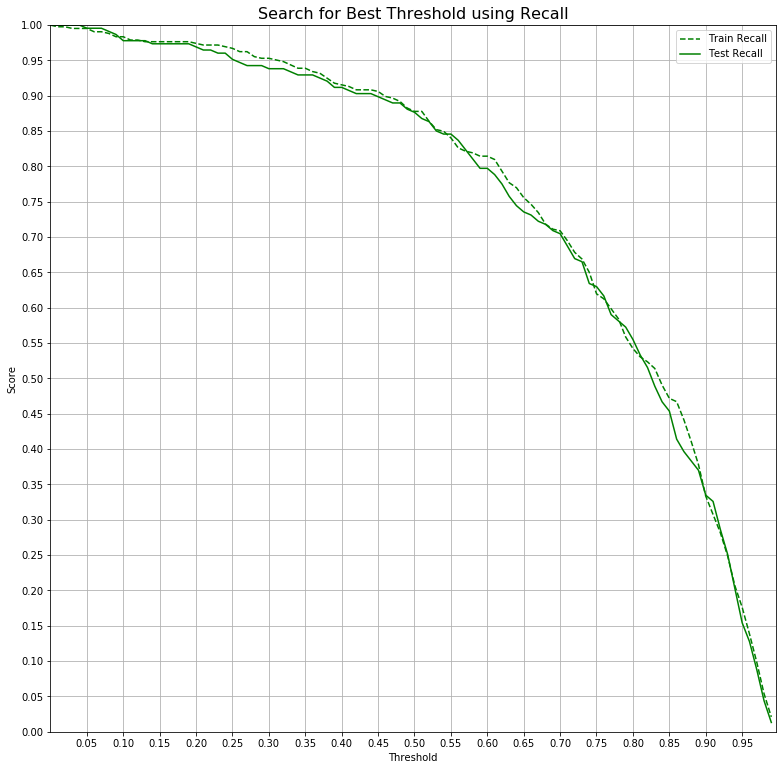

In [23]:
plt.figure(figsize=(13, 13))
plt.title("Search for Best Threshold using Recall",
          fontsize=16)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)

ax = plt.gca()
ax.set_xlim(y_train_pred_probs.min(), y_train_pred_probs.max())
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.yaxis.set_major_locator(MaxNLocator(20))

# Get the regular numpy array from the MaskedArray
X_axis = np.array(metrics_df['threshold'].values, dtype=float)

ax.plot(X_axis, metrics_df['train_recall'], ls='--',
        color='g', label='Train Recall')
ax.plot(X_axis, metrics_df['test_recall'], ls='-',
        color='g', label='Test Recall')

plt.legend()

## Part 7: What drives churn?

In [24]:
# Check Coefficients
coef_dict = {}
for coef, feat in zip(list(logreg.coef_[0]),X_train.columns.tolist()):
    coef_dict[feat] = coef
    
# Convert to dataframe so you can sort it
coef_df = pd.DataFrame.from_dict(coef_dict, columns =['Vanilla'], orient='index')
coef_df.sort_values(by=['Vanilla'], ascending = False)

,Vanilla
TechSupport,0.509799
Dependents,0.494313
TotalDayMinutes,0.429123
PaperlessBilling,0.408212
PhoneService,0.214211
OnlineBackup,0.179029
Contract,0.175251
InternetService,0.157357
tenure,0.155034
TotalCall,0.112703


In [25]:
# Check Coefficients
coef_dict = {}
for coef, feat in zip(list(logreg2.coef_[0]),X_train.columns.tolist()):
    coef_dict[feat] = coef
    
# Convert to dataframe so you can sort it
coef_df2 = pd.DataFrame.from_dict(coef_dict, columns =['Balanced'], orient='index')
coef_df2.sort_values(by=['Balanced'], ascending = False)

coef_df3 = coef_df.merge(coef_df2,left_index=True, right_index = True)
coef_df3.sort_values(by=['Balanced'], ascending = False)

,Vanilla,Balanced
TechSupport,0.509799,0.569080
Dependents,0.494313,0.510696
TotalDayMinutes,0.429123,0.415725
PaperlessBilling,0.408212,0.393494
PhoneService,0.214211,0.240020
Contract,0.175251,0.206569
InternetService,0.157357,0.159428
OnlineBackup,0.179029,0.141537
tenure,0.155034,0.113853
MaritalStatus,0.081769,0.109433


#### Set `C` to 0.02 to increase the penalty and perhaps decrease the variable set

In [26]:
logreg3 = LogisticRegression(C=.02, random_state = 100)
logreg3.fit(X_train_scaled, y_train)
y_train_pred_probs2 = logreg3.predict_proba(X_train_scaled)[:, 1]
y_test_pred_probs2 = logreg3.predict_proba(X_test_scaled)[:, 1]

In [27]:
metrics_df = pd.DataFrame(columns=['threshold', 'train_recall', 'test_recall'])

for x in np.arange(y_train_pred_probs2.min(), y_train_pred_probs2.max(), 0.01):
    placeholder = []
    threshold = x
    y_pred_train = np.where(y_train_pred_probs2 > x, 1, 0)
    r_pred_test = np.where(y_test_pred_probs2 > x, 1, 0)
    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, r_pred_test)
    placeholder = [threshold, train_recall, test_recall]
    sample_S = pd.Series(placeholder, index=[
                         'threshold', 'train_recall', 'test_recall'])
    metrics_df = metrics_df.append(sample_S, ignore_index=True)

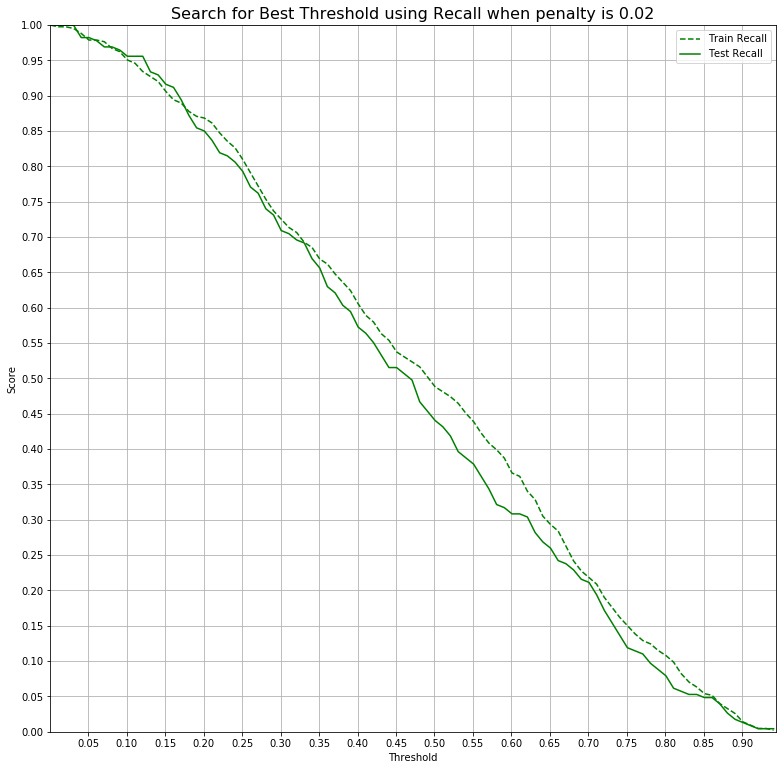

In [28]:
plt.figure(figsize=(13, 13))
plt.title("Search for Best Threshold using Recall when penalty is 0.02",
          fontsize=16)

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)

ax = plt.gca()
ax.set_xlim(y_train_pred_probs2.min(), y_train_pred_probs2.max())
ax.set_ylim(0, 1)
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.yaxis.set_major_locator(MaxNLocator(20))

# Get the regular numpy array from the MaskedArray
X_axis = np.array(metrics_df['threshold'].values, dtype=float)

ax.plot(X_axis, metrics_df['train_recall'], ls='--',
        color='g', label='Train Recall')
ax.plot(X_axis, metrics_df['test_recall'], ls='-',
        color='g', label='Test Recall')

plt.legend()

## Part 8: What are your recommendations?

- Improve tech support infrastructure/experience (Onboarding process, repairs, etc).
- Implement incentive "family plan" programs
- Maximum charge after reaching certain number of mins per day

Future study/next steps: 
Why is paperless billing a predictor of customer churn?
Can we differentiate between predictors of early churn vs late churn?